## Задачи
<ol>
<li>Реализовать нейронную сеть, которая распознает фрукт на фотографии</li>
<li>Сделать это за минимальное количество связей</li>
<li>Вывести для неё матрицу ошибок на трейнинговом и тестовом датасетах</li>
</ol>
<br>
Группа: КВБО-07-21<br>
Выполняли: Быковский В.А., Ванюшин С.Р., Данилова Д.П.

## Импорт необходимых библиотек

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import tensorflow as tf
from sklearn.metrics import confusion_matrix

## Считывание трейн датасета

In [2]:
np.random.seed(42)

directory = "./fruits/Training"
classes = [
    'Limes',
    'Lychee',
    'Mandarine',
    'Mango',
    'Mango Red',
    'Mangostan',
    'Maracuja',
    'Melon Piel de Sapo',
    'Mulberry',
    'Nectarine',
    'Nectarine Flat',
    'Nut Forest',
    'Nut Pecan',
    'Onion Red',
    'Orange',
    'Papaya',
    'Passion Fruit',
    'Peach',
    'Pear',
    'Pepino',
    'Pepper Green',
    'Physalis',
    'Physalis with Husk',
    'Pineapple',
    'Pitahaya Red',
    'Plum',
    'Pomegranate',
    'Pomelo Sweetie',
    'Potato Red',
    'Quince',
]

all_arrays = []

for folder in classes:
    path = os.path.join(directory, folder)
    class_num = classes.index(folder)
    
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        all_arrays.append([img_array, class_num])

## Считывание тестового датасета

In [3]:
directory = "./fruits/Test"

all_arrays_2 = []

for folder in classes:
    path = os.path.join(directory, folder)
    class_num = classes.index(folder)
    
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        all_arrays_2.append([img_array, class_num])

## Создание массивов данных для обучения и тестирования нейронной сети

In [4]:
random.shuffle(all_arrays)
random.shuffle(all_arrays_2)

X_train = []
Y_train = []

X_test = []
Y_test = []

for features, label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
    
for features, label in all_arrays_2:
    X_test.append(features)
    Y_test.append(label)
    
X_train = np.array(X_train)
X_test = np.array(X_test)

## Изменение размерности массивов данных для обучения и тестирования нейронной сети

In [5]:
img_size = [100, 100]

print('Shape of X_train before reshaping:', X_train.shape)
print('Shape of X_test before reshaping:', X_test.shape, end="\n\n")

X_train = X_train.reshape(-1, img_size[0], img_size[1], 3)
X_train = X_train / 255

X_test = X_test.reshape(-1, img_size[0], img_size[1], 3)
X_test = X_test / 255

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train before reshaping: (14688, 100, 100, 3)
Shape of X_test before reshaping: (4930, 100, 100, 3)

Shape of X_train: (14688, 100, 100, 3)
Shape of X_test: (4930, 100, 100, 3)


## Конвертация векторов класса в бинарную матрицу

In [6]:
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=30)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=30)

## Создание архитектуры нейронной сети

In [21]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=2, kernel_size=(5, 5), padding="Same", activation="relu", input_shape=(100, 100, 3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(5, 5), padding="Same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding="Same", activation="relu"))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
          
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(30, activation="softmax"))

# opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

## Обучение нейронной сети

In [22]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
459/459 [==============================] - 117s 250ms/step - loss: 2.8785 - accuracy: 0.1179
Epoch 2/10
459/459 [==============================] - 116s 253ms/step - loss: 2.1820 - accuracy: 0.2657
Epoch 3/10
459/459 [==============================] - 119s 259ms/step - loss: 1.6357 - accuracy: 0.4168
Epoch 4/10
459/459 [==============================] - 123s 268ms/step - loss: 1.2983 - accuracy: 0.5253
Epoch 5/10
459/459 [==============================] - 112s 244ms/step - loss: 1.1398 - accuracy: 0.6016
Epoch 6/10
459/459 [==============================] - 116s 253ms/step - loss: 1.0090 - accuracy: 0.6522
Epoch 7/10
459/459 [==============================] - 110s 241ms/step - loss: 0.9289 - accuracy: 0.6880
Epoch 8/10
459/459 [==============================] - 121s 263ms/step - loss: 0.8575 - accuracy: 0.7169
Epoch 9/10
459/459 [==============================] - 127s 276ms/step - loss: 0.7938 - accuracy: 0.7397
Epoch 10/10
459/459 [==============================] - 131s 285m

## Построение матрицы ошибок для трейн датасета

459/459 [==============================] - 52s 106ms/step


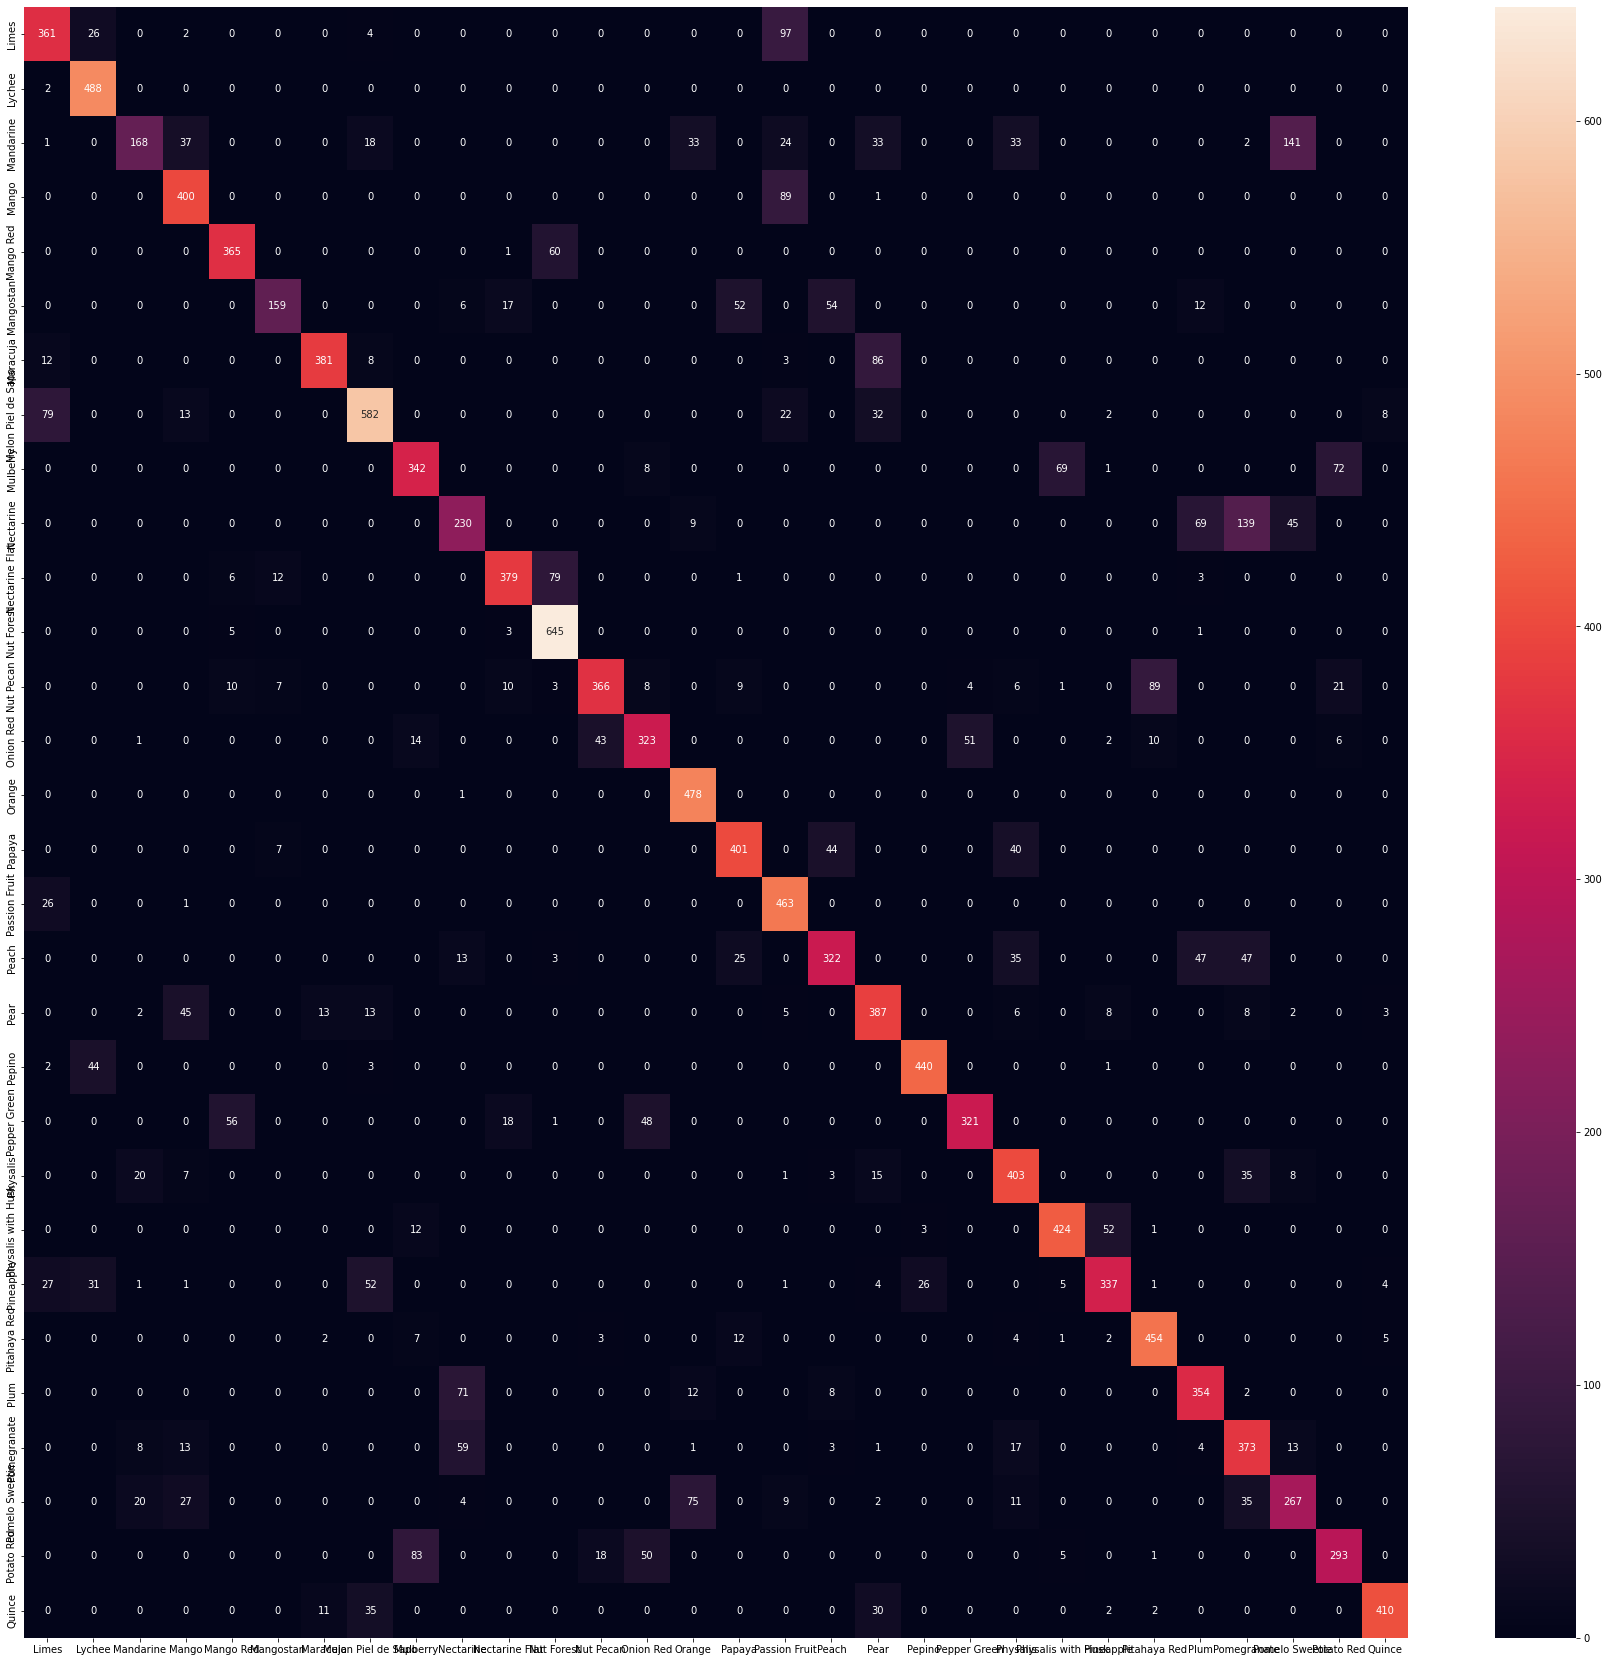

In [23]:
y_pred = model.predict(X_train)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_train, axis=1)
conf_mat = confusion_matrix(y_true, y_pred_classes)
f, ax = plt.subplots(figsize=(31, 30))
sns.heatmap(conf_mat, annot=True, fmt='.0f')
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
plt.show()


## Построение матрицы ошибок для тестового датасета

155/155 [==============================] - 18s 108ms/step


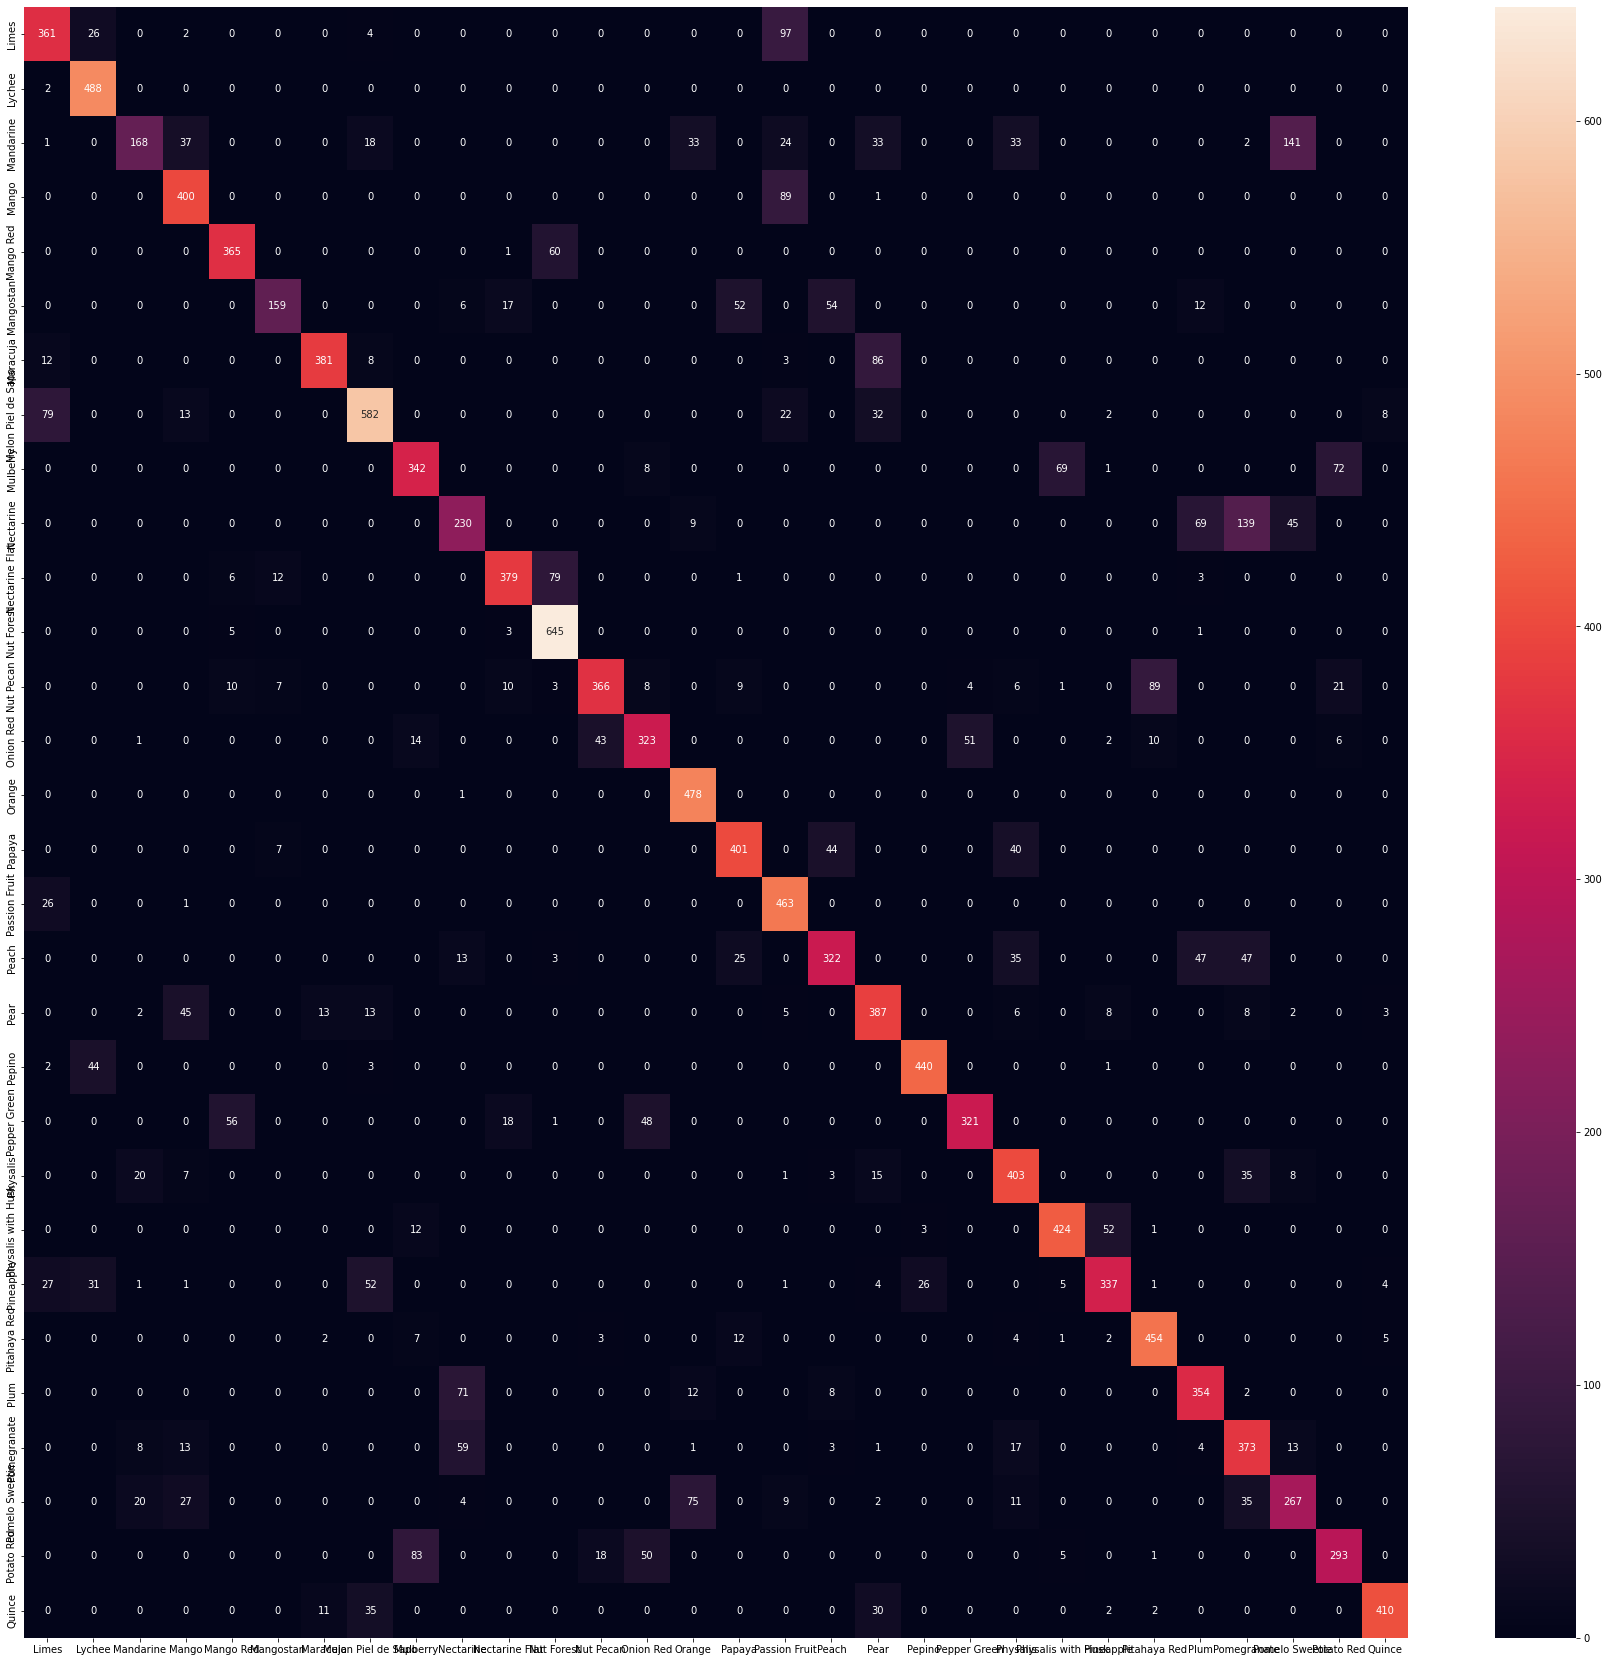

In [24]:
y_pred_2 = model.predict(X_test)
y_pred_classes_2 = np.argmax(y_pred_2, axis=1)
y_true_2 = np.argmax(Y_test, axis=1)
conf_mat_2 = confusion_matrix(y_true_2, y_pred_classes_2)
f, ax = plt.subplots(figsize=(31, 30))
sns.heatmap(conf_mat, annot=True, fmt='.0f')
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
plt.show()
